In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

geneName="hsa-mir-145"
#geneName="hsa-mir-149"

In [2]:
# Get RPM values by file_id

import glob
files = glob.glob("/home/marcelo/Documents/UTEM/Research/cancer/gdc_download_20210427_234814.548111/*/*.mirbase21.mirnas.quantification.txt")
RPM={}
for file in files:
    data = pd.read_csv(file, sep='\t', lineterminator='\n')
    rpm = data[ data["miRNA_ID"]==geneName ]["reads_per_million_miRNA_mapped"].values[0]
    file_id = file.split("/")[-2]
    RPM[file_id] = rpm

In [6]:
# Get stage by case id
file = "/home/marcelo/Documents/UTEM/Research/cancer/clinical.cart.2021-04-27/clinical.tsv"
data = pd.read_csv(file, sep='\t', lineterminator='\n')

stages={}
for index, row in data.iterrows():
    #stages[row["case_id"]] = row["tumor_stage"]
    stages[row["case_submitter_id"]] = row["tumor_stage"]

In [7]:
# Get file id by case id
file = "/home/marcelo/Documents/UTEM/Research/cancer/gdc_sample_sheet.2021-04-27.tsv"
data = pd.read_csv(file, sep='\t', lineterminator='\n')

cases,cases_sampleType={},{}
for index, row in data.iterrows():
    cases[row["Case ID"]] = row["File ID"]
    cases_sampleType[row["Case ID"]] = row["Sample Type"]

In [8]:
# Create a data frame for stage and rpm
count=0

stageID,rpmValues,sampleTypes=[],[],[]
for caseID in stages:
    stage = stages[caseID]
    fileID = cases[caseID]
    sampleType = cases_sampleType[caseID]
    rpm    = (RPM[fileID])
    rpmValues.append(rpm)
    sampleTypes.append(sampleType)
    
    if stage=='stage i' or stage=='stage ia' or stage=='stage ib':
        stageID.append("I") #stageI.append(rpm)
    elif stage=='stage ii' or stage=='stage iia' or stage=='stage iib':
        stageID.append("II") #stageII.append(rpm)   
    elif stage=='stage iii' or stage=='stage iiia' or stage=='stage iiib' or stage=='stage iiic':
        stageID.append("III") #stageIII.append(rpm)  
    elif stage=='stage iv':
        stageID.append("IV") #stageIV.append(rpm)     
    elif stage=='stage x':
        stageID.append("X") #stageX.append(rpm)  
    else:
        stageID.append("None")
        
dataF = pd.DataFrame( data = {'Stage': stageID, 'RPM': rpmValues, "SampleType": sampleTypes})

print(count)

0


In [10]:
dataF

,Stage,RPM,SampleType
0,I,3295.444519,Primary Tumor
1,III,19031.646632,Solid Tissue Normal
2,I,845.797545,Primary Tumor
3,III,2662.576714,Primary Tumor
4,II,480.615402,Primary Tumor
...,...,...,...
1029,IV,1010.370293,Primary Tumor
1030,II,799.223185,Primary Tumor
1031,II,832.170851,Primary Tumor
1032,II,1119.994075,Primary Tumor


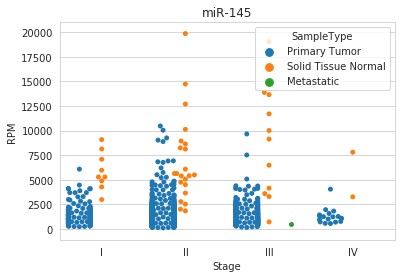

In [9]:
order=["I","I'","II","II'","III","III'","IV","IV'"]#,"X","X'","None","None'",]
order=["I","II","III","IV"]#,"X","X'","None","None'",]
plt.figure()
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.swarmplot(x="Stage", y="RPM", hue="SampleType",dodge=True,  data=dataF,order=order).set_title(geneName)


In [ ]:
#Plot results
for i in range(3):
    sampleCathegory = ["Solid Tissue Normal", "Primary Tumor", "Metastatic"]
    dataX= dataF[ dataF["SampleType"] == sampleCathegory[i] ]

    plt.figure()
    sns.set_style("whitegrid")
    tips = sns.load_dataset("tips")
    ax = sns.swarmplot(x="Stage", y="RPM",  data=dataX,order=["I","II","III","IV","X","None"]).set_title("miR-149")

# ax = sns.boxplot(x="Stage", y="RPM", data=dataF,
#         showcaps=False,boxprops={'facecolor':'None'},
#         showfliers=False,whiskerprops={'linewidth':0})


#plt.savefig("mir149.svg")

In [ ]:
# Get number of samples per stage



dups_shape = dataF.pivot_table(index=['Stage'], aggfunc='size')
print (dups_shape)

In [ ]:
dups_shape = dataF.pivot_table(index=['SampleType'], aggfunc='size')
print (dups_shape)